In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic1.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.shape

(418, 12)

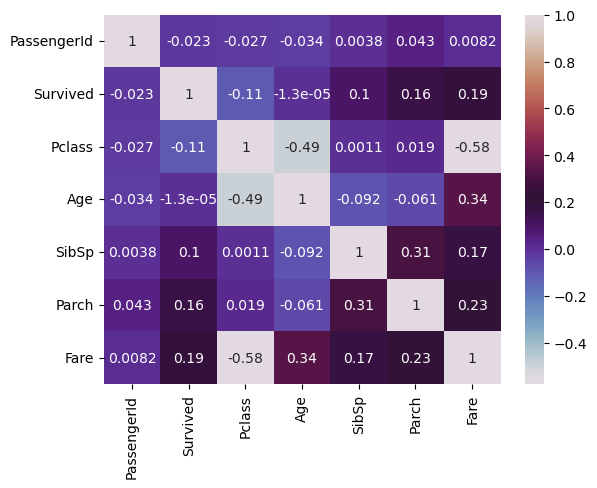

In [7]:
#checking for how closely related the columns are to each other
sns.heatmap(df.corr(),cmap='twilight', annot=True)
plt.show()

In [8]:

# Drop columns not needed for modelling
df.drop(columns=['Cabin'], inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [9]:
#fill missing values in total_bedrooms with the mean using fillna
age= df['Age'].mean()
fare= df['Fare'].mean()
df = df.fillna({'Age' : age , 'Fare' : fare})
df['Age'] = df['Age'].astype(int)

In [10]:
 #df = df['Age'].astype('int64',axis=1)
df=df.astype({'Age':'int64','Fare':'int64'})


In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Name         418 non-null    object
 4   Sex          418 non-null    object
 5   Age          418 non-null    int64 
 6   SibSp        418 non-null    int64 
 7   Parch        418 non-null    int64 
 8   Ticket       418 non-null    object
 9   Fare         418 non-null    int64 
 10  Embarked     418 non-null    object
dtypes: int64(7), object(4)
memory usage: 36.0+ KB


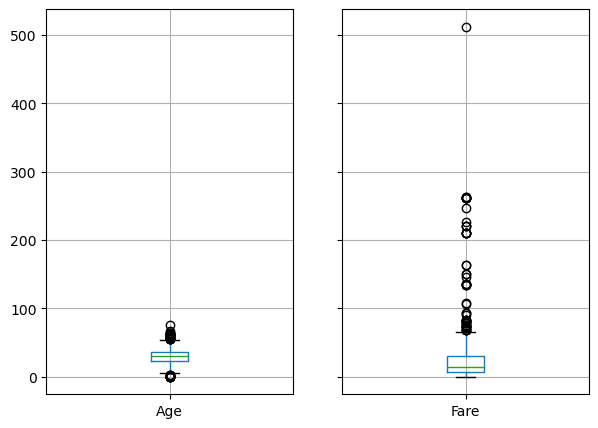

In [13]:
#checking for outliers

fig, ( ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,5))
df.boxplot('Age', ax=ax1)
df.boxplot('Fare', ax=ax2)
plt.show()

In [14]:
#from above outliers exist in last two numeric columns : {Age, Fare}
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    lst = df.index[(df[ft] < lowerBound)|(df[ft] > upperBound)]
    return lst

In [15]:
lst=[]
for ft1 in ['Age']:
    lst.extend(outliers(df,ft1))
for ft2 in ['Fare']:
    lst.extend(outliers(df,ft2))
df = df.drop(lst)

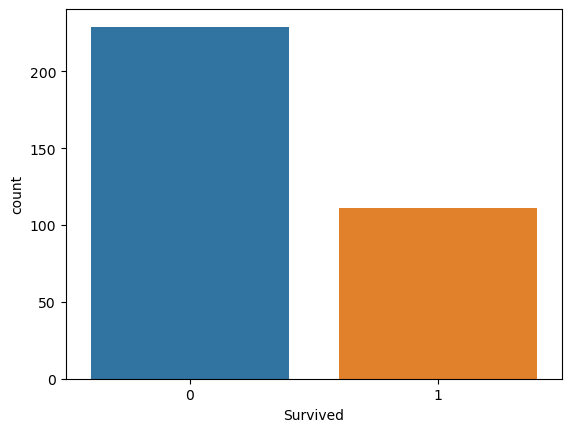

In [16]:
#survival plot
sns.countplot(x='Survived', data=df);

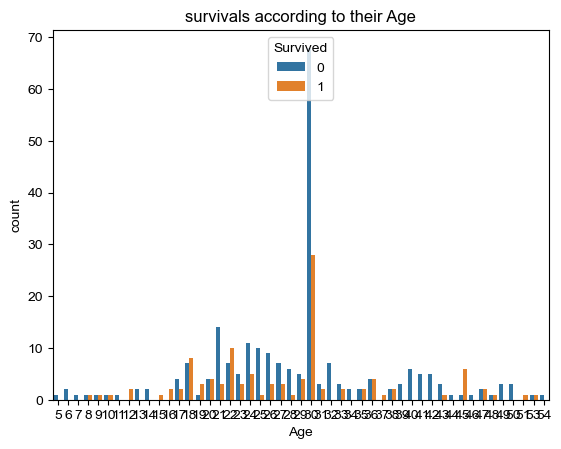

In [17]:
sns.countplot(data = df, x = 'Age', hue = 'Survived')
sns.set(rc={'figure.figsize':(12,13)})
plt.title('survivals according to their Age');

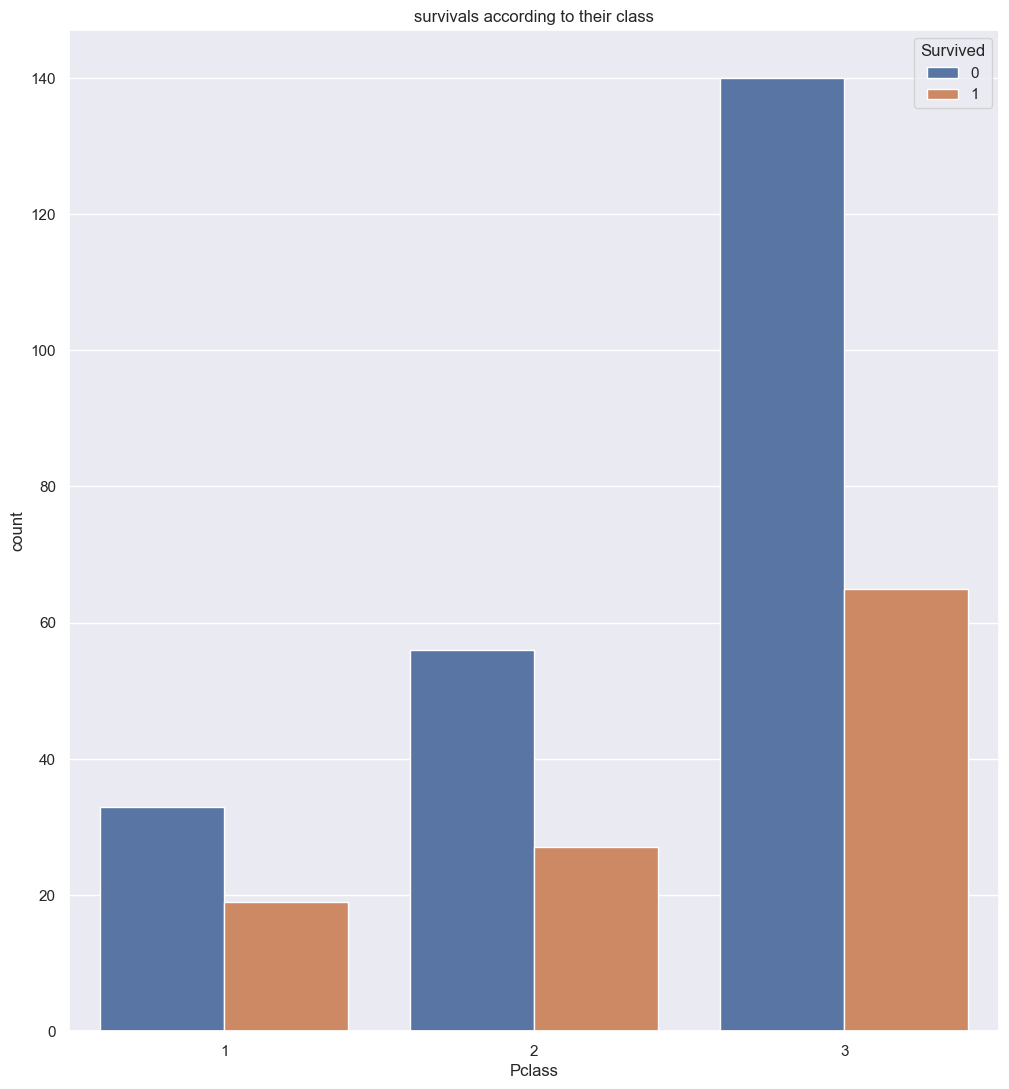

In [18]:
sns.countplot(data = df, x = 'Pclass', hue = 'Survived')
sns.set(rc={'figure.figsize':(7,7)})
plt.title('survivals according to their class');

Text(0.5, 1.0, 'survivals according to their sex')

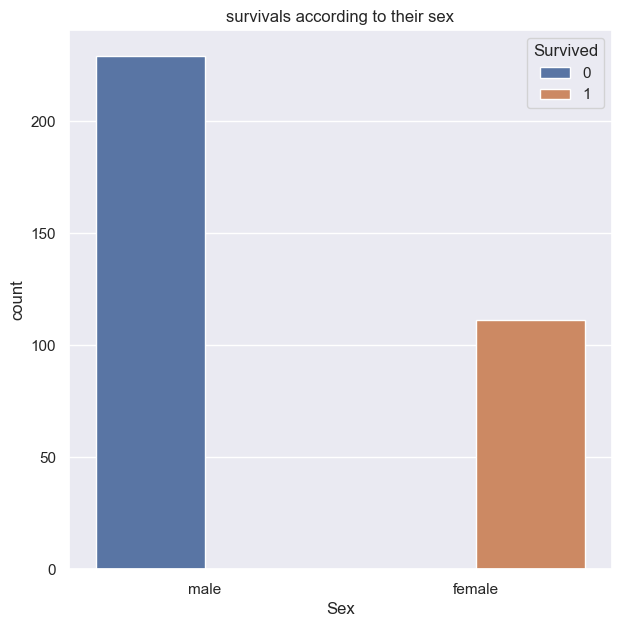

In [19]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

plt.title('survivals according to their sex')

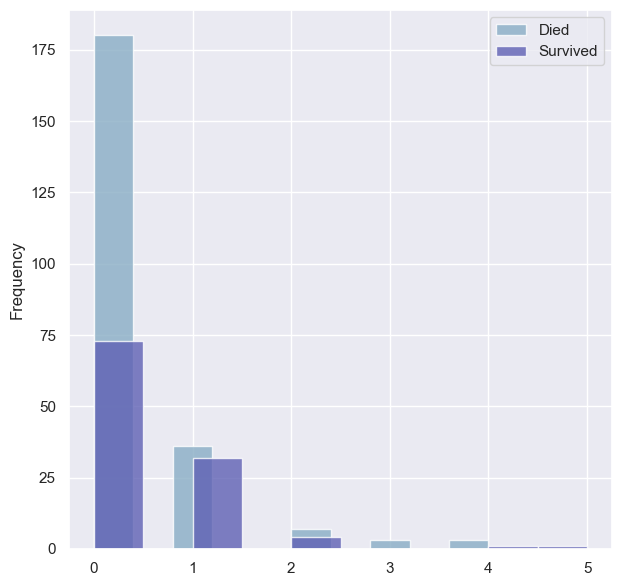

In [20]:
sns.set_palette("twilight")
df.groupby('Survived', as_index=False)['SibSp'].plot.hist(histtype= 'bar',alpha = 0.8)
sns.set(rc={'figure.figsize':(7,8.27)})
plt.legend(('Died','Survived'),)
plt.show()

Text(0.5, 1.0, 'how Families located in different calss could make it')

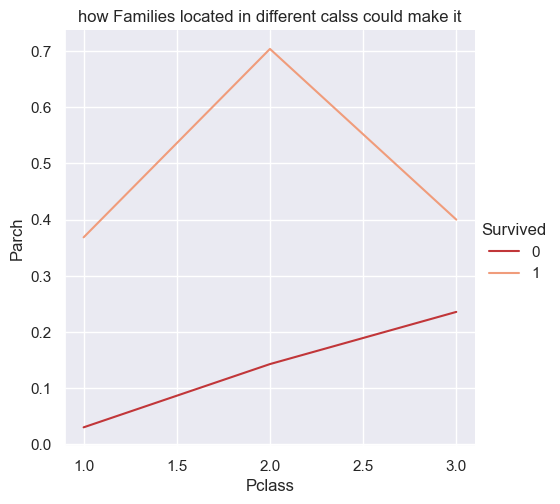

In [21]:
sns.set_palette("RdBu")
sns.relplot(x="Pclass",             
            y="Parch",             
            data=df,            
            kind="line",
            hue= 'Survived',
            ci=None
            )
plt.title('how Families located in different calss could make it')

In [22]:
#converting object to int
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert all categorical columns to numeric using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,167,1,34,0,0,129,7,1
1,893,1,3,326,0,47,1,0,196,7,2
3,895,0,3,330,1,27,0,0,124,8,2
4,896,1,3,142,0,22,1,1,115,12,2
5,897,0,3,296,1,14,0,0,231,9,2


In [24]:
df['Embarked'].unique()

array([1, 2, 0])

In [25]:
df.drop(columns=['Name','Ticket','PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7,1
1,1,3,0,47,1,0,7,2
3,0,3,1,27,0,0,8,2
4,1,3,0,22,1,1,12,2
5,0,3,1,14,0,0,9,2


In [26]:
#importing code for modelling the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression

In [27]:
#process data
x = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [28]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [29]:
# Initialize the machine learning model (in this case, RandomForestClassifier)
model = RandomForestClassifier()


In [30]:
# Train the model on the training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
# Predict on training and test sets
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [32]:
# Evaluate the model on the test set
accuracy = model.score(x_test, y_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [35]:
confusion_matrix(y_test, y_pred)

array([[46,  0],
       [ 0, 22]], dtype=int64)

In [36]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
#improve the model 
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'Model accuracy on test set : {model.score(x_test, y_test)* 100:.2f}%')
    print('')

Trying model with 10 estimators...
Model accuracy on test set : 100.00%

Trying model with 20 estimators...
Model accuracy on test set : 100.00%

Trying model with 30 estimators...
Model accuracy on test set : 100.00%

Trying model with 40 estimators...
Model accuracy on test set : 100.00%

Trying model with 50 estimators...
Model accuracy on test set : 100.00%

Trying model with 60 estimators...
Model accuracy on test set : 100.00%

Trying model with 70 estimators...
Model accuracy on test set : 100.00%

Trying model with 80 estimators...
Model accuracy on test set : 100.00%

Trying model with 90 estimators...
Model accuracy on test set : 100.00%



using the above estimator (RandomForestClassifier) gave us a 100% predicting accuracy 

In [38]:
#lets try using RandomForestRegression
from sklearn.ensemble import RandomForestRegressor 


In [39]:
#instantiate model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
#evaluate model
rf.score(x_test, y_test)

1.0

RandomForestRegrssor also gave us a 100% prediction accuracy

In [41]:
#lets try using linearSupport vector classification
from sklearn.svm import LinearSVC


In [42]:
#initiate model
model1 = LinearSVC()
model1.fit(x_train, y_train)

C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [43]:
#evaluate model
model1.score(x_test, y_test)

1.0

LinearSVC also gave a 100% prediction accuracy

In [44]:
#using trained model to make predictions using predict()

model.predict(x_test)


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [45]:
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [46]:
#compare predictions to truth labels(y) to evaluate model
y_pred = model.predict(x_test)
np.mean(y_pred==y_test)

1.0

In [47]:
#using trained model to make predictions using predict_proba
model.predict_proba(x_test[:5])

array([[0.04444444, 0.95555556],
       [0.94444444, 0.05555556],
       [0.76666667, 0.23333333],
       [0.07777778, 0.92222222],
       [0.95555556, 0.04444444]])

In [48]:
print(model.predict([[3, 1, 26, 0, 0, 7 ,0]]))
print(model.predict([[3, 0, 35, 0, 0, 8, 0]]))

[0]
[1]


C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
